# Google Colab for Intro to Machine Learning 




*  It is an interactive web-based IDE (interactive development environment) that combines live code, visualization, equations, etc.
*  Essentially, it is a free Jupyter notebook that runs code on google servers instead of your local PC. 
*  You can also read and write your files in your drive using the mount option. 




**Different Api's that are used for ML in python**

*   Scipy
*   Scikit-learn
*   Theano
*   TensorFlow
*   Keras
*   **PyTorch**
*   Pandas



Importing Some Python Libraries that are Required

In [ ]:
import torch
from torch.utils.data import Dataset
from torchvision import datasets
from torchvision.transforms import ToTensor
import matplotlib.pyplot as plt
import numpy as np

Downloading the Dataset from pytorch 

In [ ]:
training_data = datasets.MNIST(root="data",train=True, download=True, transform=ToTensor())

test_data = datasets.MNIST(root="data", train=False, download=True, transform=ToTensor())

  0%|          | 0/9912422 [00:00<?, ?it/s]

Extracting data/MNIST/raw/train-images-idx3-ubyte.gz to data/MNIST/raw



  0%|          | 0/28881 [00:00<?, ?it/s]

Extracting data/MNIST/raw/train-labels-idx1-ubyte.gz to data/MNIST/raw



  0%|          | 0/1648877 [00:00<?, ?it/s]

Extracting data/MNIST/raw/t10k-images-idx3-ubyte.gz to data/MNIST/raw



  0%|          | 0/4542 [00:00<?, ?it/s]

Extracting data/MNIST/raw/t10k-labels-idx1-ubyte.gz to data/MNIST/raw



Finding the length of Training and Testing set

In [ ]:
print(training_data.targets.shape)
print(test_data.targets.shape)

torch.Size([60000])
torch.Size([10000])


Plotting 10 random examples of each digit

<function matplotlib.pyplot.show>

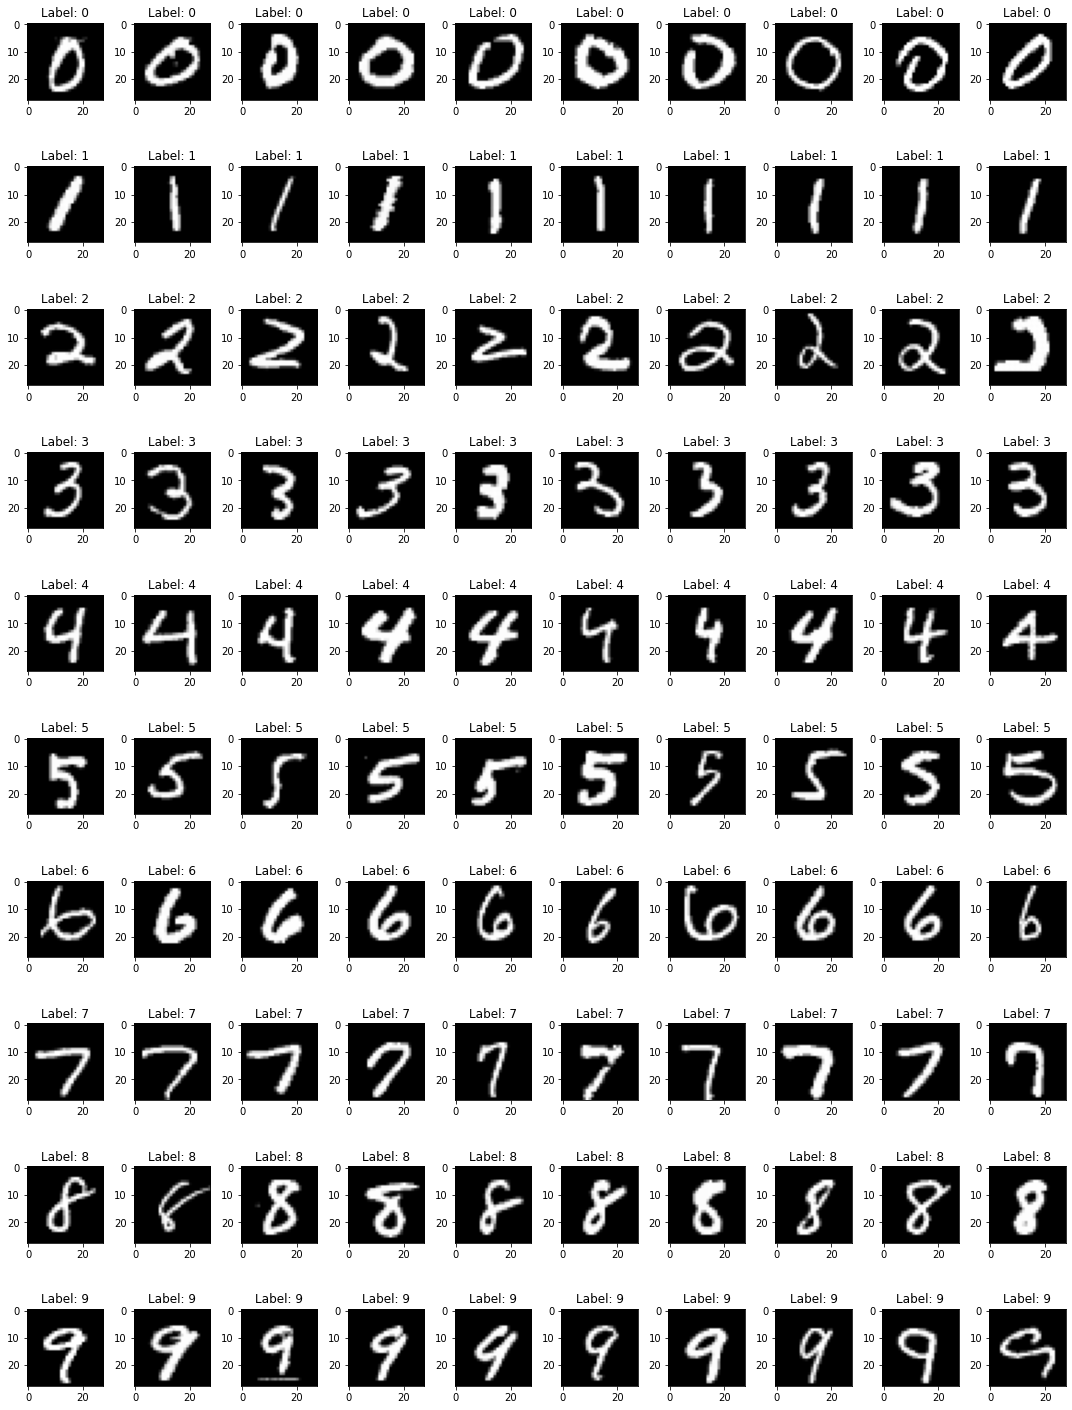

In [ ]:
num_row = 10
num_col = 10
fig, axes = plt.subplots(num_row, num_col, figsize=(1.5*num_col,2*num_row))

for i in range(10):
  idx = (training_data.targets==i)
  temp_data = training_data.data[idx]
  temp_target = training_data.targets[idx]

  for j in range(10):
    idx1 = np.random.randint(0,len(temp_target))
    ax = axes[i, j]
    ax.imshow(temp_data[idx1], cmap='gray')
    ax.set_title('Label: {}'.format(temp_target[idx1]))
plt.tight_layout()
plt.show

## Introduction
#### **MOUNT GOOGLE DRIVE**

With just two lines of code we can mount your google drive to load/save files.


PS: A prompt will be generated to verify the access. 


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


**BASH**

*   It is a Command Line Interpreter(CLI) which is a form of using the Operating System(OS). 
*   It allows the user to communicate with the kernel (a program at the core of a computer's OS).
*   **BASH** within Google Colab can be accessed with **!** or **%**.



Some Useful BASH commands:

## **`echo`**

**`echo` is a command that outputs the strings that are passed to it as arguments. `echo` can be thought of as a print function.**

In [ ]:
!echo hello world

hello world


## **`man`**

**`man` or "manual", is an interface to the system reference manuals. Manual is used to describe commands.**

In [ ]:
!man echo

ECHO(1POSIX)               POSIX Programmer's Manual              ECHO(1POSIX)

PPRROOLLOOGG
       This  manual  page is part of the POSIX Programmer's Manual.  The Linux
       implementation of this interface may differ (consult the  corresponding
       Linux  manual page for details of Linux behavior), or the interface may
       not be implemented on Linux.

NNAAMMEE
       echo — write arguments to standard output

SSYYNNOOPPSSIISS
       echo [[_s_t_r_i_n_g...]]

DDEESSCCRRIIPPTTIIOONN
       The _e_c_h_o utility writes its arguments to standard output, followed by a
       <newline>.  If there are no arguments, only the <newline> is written.

OOPPTTIIOONNSS
       The  _e_c_h_o  utility  shall not recognize the ""−−−−"" argument in the manner
       specified  by  Guideline  10  of  the  Base   Definitions   volume   of
       POSIX.1‐2008,  _S_e_c_t_i_o_n  _1_2_._2,  _U_t_i_l_i_t_y _S_y_n_t_a_x _

## **`pwd`**

**`pwd` or "print work directory", returns the current working directory. The default working directory for Google Colab is the `/content` folder.**

In [ ]:
!pwd

## **`mkdir`**

**`mkdir` or "make directory", creates a new directory or folder.**

In [ ]:
!mkdir /content/drive/MyDrive/ML_Demo_5722

## **`cd`**

**`cd` or "change directory", is used to change the working directory. The path name is input after `cd`.**

In [ ]:
%cd /content/drive/MyDrive/ML_Demo_5722

/content/drive/MyDrive/ML_Demo_5722


## **`ls`**

**`ls` or "list", prints out the content within the current working directory.**

In [ ]:
!ls

Cric_data.csv  data


Upload the file sent through mail to the created directory

In [ ]:
!ls

Cric_data.csv


In [ ]:
import torch
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from torch.utils.data import Dataset
from torch.utils.data import DataLoader
from sklearn.model_selection import train_test_split

In [ ]:
file_out=pd.read_csv('/content/drive/MyDrive/ML_Demo_5722/Cric_data.csv')
print(file_out.head())

                Player  No. of Matches  Runs Scored  Batting Average  \
0      Jack Wildermuth              36         1664            28.20   
1      Akila Dananjaya              45          971            24.27   
2  Sanjaya Gangodawila              53         2223            28.87   
3       Janeiro Tucker               8          336            28.00   
4      Aruna Priyantha             134         4574            21.37   

   Wickets Taken  Bowling Average Player Role  Player Class  
0             85            30.17  Allrounder             0  
1            147            27.54  Allrounder             0  
2             12            28.25  Allrounder             0  
3              5            45.60  Allrounder             0  
4            206            24.36  Allrounder             0  


In [ ]:
class Featuredataset(Dataset):
    def __init__(self,filename):
    #read csv file and load row data into variable
      file_out=pd.read_csv(filename)
      x=file_out.iloc[0:,  1:6].values
      y=file_out.iloc[0:,  7].values
      self.X_data=torch.tensor(x, dtype=torch.float32)
      self.Y_data=torch.tensor(y)
      print(self.X_data)

  

    def __len__(self):
      return len(self.Y_data)
    
    def __getitem__(self,idx):
      return self.X_train[idx],self.Y_train[idx]

    def plotterdata(self):
      #_______________________________Bowiling avg VS Batting Average___________________________________
      plt.rcParams.update({'figure.figsize':(10,8), 'figure.dpi':100})
      plt.scatter(self.X_data[self.Y_data==0,2],self.X_data[self.Y_data==0,4],color = 'blue',marker= '*', label='All rounder')
      plt.scatter(self.X_data[self.Y_data==-1,2],self.X_data[self.Y_data==-1,4],color = 'hotpink',marker= 'o', label='Batsman')
      plt.scatter(self.X_data[self.Y_data==1,2],self.X_data[self.Y_data==1,4],color = 'red',marker= 'x', label='Bowler')
      plt.title('Data visualization of Cricket data')
      plt.xlabel('Batting Average')
      plt.ylabel('Bowling Average')
      plt.legend(loc='best')
      plt.show()
      #_______________________________Wickets taken VS Runs scored___________________________________
      plt.rcParams.update({'figure.figsize':(10,8), 'figure.dpi':100})
      plt.scatter(self.X_data[self.Y_data==0,1],self.X_data[self.Y_data==0,3],color = 'blue',marker= '*', label='All rounder')
      plt.scatter(self.X_data[self.Y_data==-1,1],self.X_data[self.Y_data==-1,3],color = 'hotpink',marker= 'o', label='Batsman')
      plt.scatter(self.X_data[self.Y_data==1,1],self.X_data[self.Y_data==1,3],color = 'red',marker= 'x', label='Bowler')
      plt.title('Data visualization of Cricket data')
      plt.xlabel('Runs Scored')
      plt.ylabel('Wickets Taken')
      plt.legend(loc='best')
      plt.show()
    
    def train_test_split(self):
      #Split in 80:20 ratio
      self.X_train, self.X_test, self.y_train,self.y_test = train_test_split(self.X_data, self.Y_data,test_size=0.2)
      print(len(self.y_train))
      print(len(self.y_test))


    def trainset(self):
      return self.X_train,self.y_train
    
    def testset(self):
      return self.X_test,self.y_test


In [ ]:
featureset= Featuredataset('/content/drive/MyDrive/ML_Demo_5722/Cric_data.csv')
featureset.train_test_split()
trainloader= DataLoader(featureset.trainset,batch_size=10,shuffle=False)


tensor([[  36.0000, 1664.0000,   28.2000,   85.0000,   30.1700],
        [  45.0000,  971.0000,   24.2700,  147.0000,   27.5400],
        [  53.0000, 2223.0000,   28.8700,   12.0000,   28.2500],
        ...,
        [  38.0000,  214.0000,   11.2600,   99.0000,   40.6900],
        [ 219.0000, 1536.0000,    8.3900,  709.0000,   31.2200],
        [ 184.0000, 4130.0000,   21.0700,  471.0000,   32.0800]])
1017
255


In [ ]:
l=featureset.__len__()
print(l)

1272


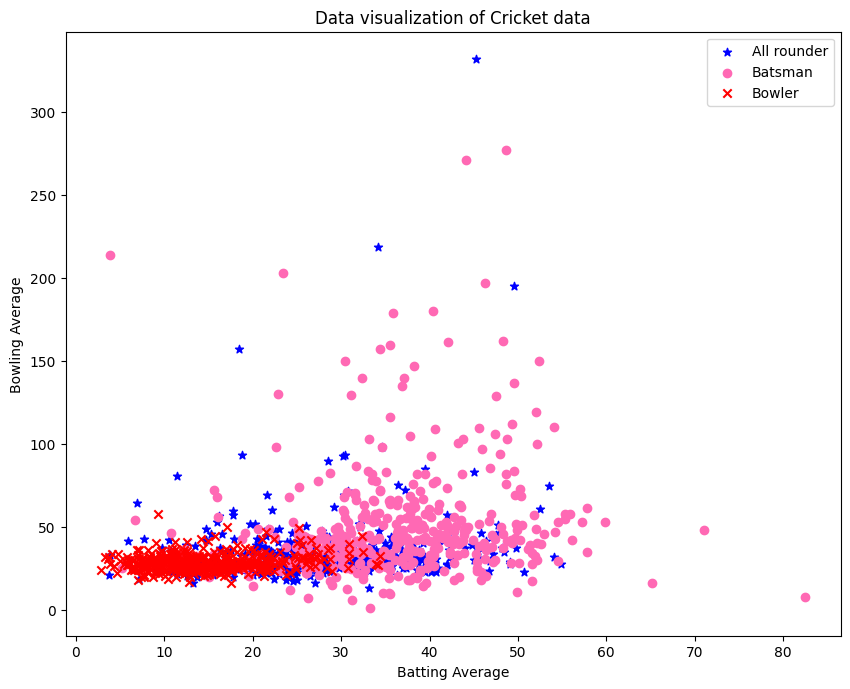

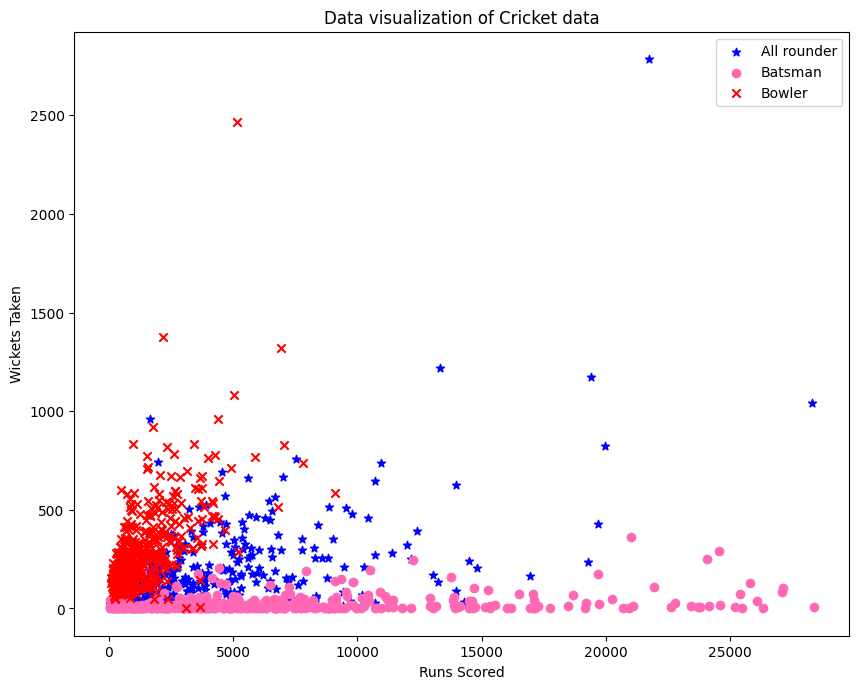

In [ ]:
featureset.plotterdata()

Some References:


1.   https://www.geeksforgeeks.org/best-python-libraries-for-machine-learning/
2.   https://colab.research.google.com/?utm_source=scs-index#scrollTo=-Rh3-Vt9Nev9
3. https://pytorch.org/tutorials/beginner/basics/intro.html
4. https://youtu.be/E54volo2B2s
5. https://github.com/tudev/Workshops-2020-2021/tree/master/Google%20Colab%20Tutorials


